# Proyek Analisis Data: Bike Sharing Analyst

- **Nama:** Arum Candra Sari
- **Email:** sarumcandra@gmail.com
- **ID Dicoding:** arum_can

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda pada dua tahun tersebut?
- Bagaimana pengaruh musim,kondisi cuaca, dan hari libur terhadap penyewaan sepeda?

## Import Semua Packages/Library yang Digunakan

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [101]:
# Membuka file di Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Data Wrangling

### Gathering Data

In [102]:
day_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/day.csv')
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [103]:
hour_df = pd.read_csv('/content/drive/MyDrive/Bike-sharing-dataset/hour.csv')
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
- Terdapat dua tabel yaitu tabel day dan tabel hour yang masing-masing memiliki 16 kolom dan 17 kolom. Pada tabel hour, kolom yang dimiliki sama dengan tabel day ditambah 1 kolom `hr` yang menunjukkan waktu per jam dari 0-23.


- Informasi kolom:
---
`instant`: indeks data \\
`dteday` : tanggal \\
`season` : musim (1: spring, 2: summer, 3: fall, 4: winter) \\
`yr` : year (0: 2011, 1: 2012) \\
`mnth` : bulan (1-12) \\
`holiday` : hari tersebut merupakan hari libur atau tidak \\
`weekday` : hari per minggu (0-6) \\
`workingday` : (1: hari biasa, 0: hari libur) \\
`weathersit` : \\
1: Clear, Few clouds, Partly cloudy, Partly cloudy \\
2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist \\
3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds \\
4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog \\
`temp` : suhu \\
`atemp` : suhu yang dirasakan \\
`hum` : kelembapan \\
`windspeed` : kecepatan angin \\
`casual` : jumlah pelanggan umum \\
`registered` : jumlah pelanggan terdaftar \\
`cnt`: jumlah pelanggan umum dan terdaftar






### Assessing Data

In [104]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [105]:
print('Jumlah duplikasi:', day_df.duplicated().sum())
day_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [106]:
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [107]:
print('Jumlah duplikasi:', hour_df.duplicated().sum())
hour_df.describe()

Jumlah duplikasi: 0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


**Insight:**
- Terdapat 731 baris pada tabel day dan 17.379 pada tabel hour. Didapati pada kedua tabel tidak ada data yang kosong maupun data yang terduplikasi
- Terdapat kesalahan tipe data pada kolom `dteday` yang masih bertipe **object.** Untuk itu diperlukan cleaning data untuk mengubah tipe data menjadi **datetime** agar memudahkan analisis data ketika memanggil tanggal.

### Cleaning Data

In [108]:
# Mengubah tipe data menjadi datetime pada tabel day
datetime_columns = ["dteday"]
for column in datetime_columns:
    day_df[column] = pd.to_datetime(day_df[column])
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [109]:
# Mengubah tipe data menjadi datetime pada tabel hour
datetime_columns = ["dteday"]
datetime_columns = ["dteday"]
for column in datetime_columns:
    hour_df[column] = pd.to_datetime(hour_df[column])
hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Berhasil mengubah tipe data `dteday` dari **object** menjadi **datetime** pada kedua tabel.
- Kedua tabel telah siap untuk dianalisis lebih lanjut.

## Exploratory Data Analysis (EDA)

*   **EDA Eksplorasi Data Hour**



In [110]:
# Mengetahui infromasi pada tabel hour
hour_df.describe(include="all")

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2012-01-02 04:08:34.552045568,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
min,1.0000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2011-07-04 00:00:00,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,2012-01-02 00:00:00,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,2012-07-02 00:00:00,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599


**Insight:** Diperolah data penyewa dari tanggal 01-01-2011 sampai 31-12-2012. Jumlah minimal penyewa dalam 1 jam adalah 1 penyewa dan jumlah maksimal penyewa dalam 1 jam adalah 977 penyewa. Jadi, diperolah rata-rata penyewa per jamnya adalah 190 penyewa.



*   **Jumlah penyewa berdasarkan tahun**



In [111]:
# Nilai minimum, maximum, dan rata-rata penyewa berdasarkan tahun
day_df.groupby(by='yr').agg({
    "dteday": "nunique",
    "casual": "sum",
    "registered": "sum",
    "cnt": ["min", "max", "mean", "sum"]
})

dteday  casual registered  cnt                            
   nunique     sum        sum  min   max         mean      sum
yr                                                            
0      365  247252     995851  431  6043  3405.761644  1243103
1      366  372765    1676811   22  8714  5599.934426  2049576

**Insight:**
* Jumlah penyewa sepeda dari 2011 menuju 2012 menunjukkan tren kenaikan jika dilihat dari nilai rata-rata dan jumlahnya. Jumlah penyewa pada tahun 2011 sebanyak 1.243.103 penyewa dan pada tahun 2012 sebanyak 2.049.576.
* Pada data penyewa umum dan penyewa terdaftar juga menunjukkan tren kenaikan di dua tahun tersebut.

* **Jumlah penyewa berdasarkan season/musim**

In [112]:
#jumlah keseluruhan, minimum, maksimum, dan rata-rata penyewa setiap season
day_df.groupby('season').agg({
    "cnt": ["min", "max", "mean", "sum"]
})

cnt                            
         min   max         mean      sum
season                                  
1        431  7836  2604.132597   471348
2        795  8362  4992.331522   918589
3       1115  8714  5644.303191  1061129
4         22  8555  4728.162921   841613

In [113]:
#rata-rata jumlah penyewa umum dan terdaftar setiap season berdasarkan tahun
day_df.groupby(by=['yr', 'season']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered     cnt
yr season                            
0  1        21425      128575  150000
   2        77564      269752  347316
   3        95450      324200  419650
   4        52813      273324  326137
1  1        39197      282151  321348
   2       125958      445315  571273
   3       130641      510838  641479
   4        76969      438507  515476

**Insight**:
* Berdasarkan season/musim, jumlah penyewa terbanyak terjadi pada season 3 atau Fall season yang memiliki rata-rata dan jumlah penyewa yang lebih banyak dari 3 season yang lain. Sedangkan season yang memiliki jumlah dan rata-rata penyewa paling sedikit yaitu Spring season.
* Jika dilihat dari per tahunnya, jumlah penyewa terbanyak dan paling sedikitnya juga merupakan Fall season dan Spring season.

* **Jumlah penyewa berdasarkan cuaca**

In [114]:
# Jumlah penyewa berdasarkan cuaca
day_df.groupby('weathersit').agg({
    "cnt": ["min", "max", "mean", "sum"]
})

cnt                            
            min   max         mean      sum
weathersit                                 
1           431  8714  4876.786177  2257952
2           605  8362  4035.862348   996858
3            22  4639  1803.285714    37869

**Insight:** Berdasarkan cuaca, didapatkan cuaca 1 atau cerah memiliki jumlah dan rata-rata penyewa paling banyak. Sedangkan cuaca 3 atau hujan/salju ringan memiliki jumlah dan rata-rata penyewa paling sedikit.

In [115]:
# Jumlah penyewa berdasarkan hari libur
day_df.groupby(['workingday']).agg({
    "cnt": ["min", "max", "mean", "sum"]
})

cnt                            
            min   max         mean      sum
workingday                                 
0           605  8714  4330.168831  1000269
1            22  8362  4584.820000  2292410

**Insight:** Berdasarkan hari libur, didapatkan jumlah penyewa pada hari biasa/kerja mencapai 2.292.410 sementara pada hari libur mencapai 1.000.269. Untuk rata-ratanya tidak terlalu berbeda jauh secara signifikan.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana tren penyewa sepeda pada dua tahun tersebut?

In [116]:
# Jumlah penyewa per bulan
day_df.groupby('mnth').agg({
    "cnt": ["min", "max", "mean", "sum"]
})

cnt                           
       min   max         mean     sum
mnth                                 
1      431  4521  2176.338710  134933
2     1005  5062  2655.298246  151352
3      605  8362  3692.258065  228920
4      795  7460  4484.900000  269094
5     2633  8294  5349.774194  331686
6     3767  8120  5772.366667  346342
7     3285  8173  5563.677419  344948
8     1115  7865  5664.419355  351194
9     1842  8714  5766.516667  345991
10      22  8156  5199.225806  322352
11    1495  6852  4247.183333  254831
12     441  6606  3403.806452  211036

**Insight:** Untuk memperjelas bagaimana tren data pada tahun 2011-2012, akan digunakan data jumlah penyewa per bulan pada tahun tersebut agar kenaikan dan penurunan jumlah penyewa lebih terlihat pada rentang waktu tersebut.

In [117]:
# Mengubah indeks tiap kolom menjadi string agar lebih mudah dibaca untuk visualisasi data
mnth_map = {
    1: "Jan", 2: "Feb", 3: "Mar", 4: "Apr", 5: "May", 6: "Jun",
    7: "Jul", 8: "Aug", 9: "Sep", 10: "Oct", 11: "Nov", 12: "Dec"
}
day_df["season"] = day_df["season"].map({
    1: "Spring",
    2: "Summer",
    3: "Fall",
    4: "Winter"
})
day_df["mnth"] = day_df["mnth"].map(mnth_map)
day_df["yr"] = day_df["yr"].map({0: 2011, 1: 2012})
day_df["workingday"] = day_df["workingday"].map({0: "Holiday", 1: "Workingday"})
day_df["weathersit"] = day_df["weathersit"].map({
    1: "Clear/Cloudy",
    2: "Mist + Cloudy",
    3: "Light Snow/Rain",
    4: "Heavy Rain/Snow"})
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,Spring,2011,Jan,0,6,Holiday,Mist + Cloudy,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,Spring,2011,Jan,0,0,Holiday,Mist + Cloudy,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,Spring,2011,Jan,0,1,Workingday,Clear/Cloudy,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,Spring,2011,Jan,0,2,Workingday,Clear/Cloudy,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,Spring,2011,Jan,0,3,Workingday,Clear/Cloudy,0.226957,0.229270,0.436957,0.186900,82,1518,1600


<ipython-input-118-b47ff2b803ce>:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mnth_cnt = day_df.groupby(by=["mnth", "yr"]).agg({


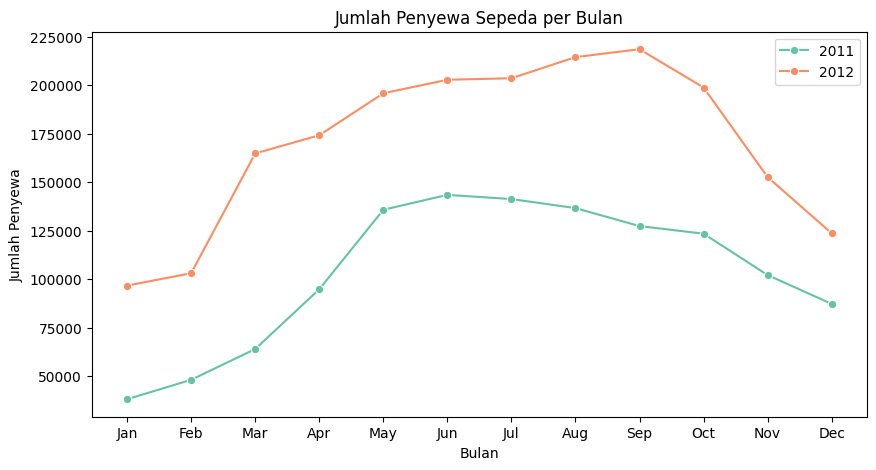

In [118]:
# Mengurutkan bulan
day_df["mnth"] = pd.Categorical(
    day_df["mnth"],
    categories=["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"],
    ordered=True
)

mnth_cnt = day_df.groupby(by=["mnth", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=mnth_cnt,
    x="mnth",
    y="cnt",
    hue="yr",
    palette="Set2",
    marker="o"
)
plt.title("Jumlah Penyewa Sepeda per Bulan", loc="center")
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Bulan")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

**Insight:** Didapati terdapat tren kenaikan dari tahun 2011 ke tahun 2012 setiap bulannya. Untuk tahun 2011, didapati tren kenaikan jumlah penyewa pada bulan Januari-Juni sementara pada bulan Juni-Desember menunjukkan tren penurunan jumlah penyewa. Pada tahun 2012, didapati tren kenaikan jumlah penyewa pada bulan Januari-September dengan kenaikan signifikan pada bulan Februari-Maret. Sementara pada bulan September-Desember menunjukkan tren penurunan jumlah penyewa. Hal ini dapat disimpulkan bahwa durasi kenaikan jumlah penyewa setiap bulannya lebih lama pada tahun 2012.

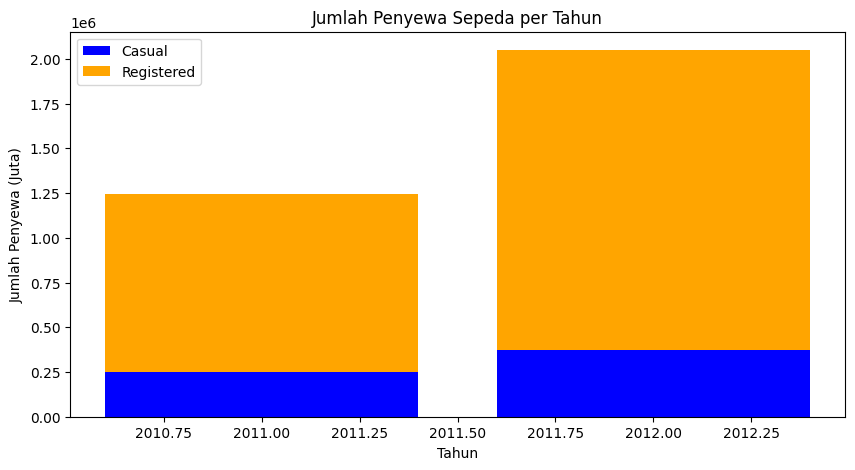

In [119]:
year_cnt = day_df.groupby(by="yr")[["casual", "registered"]].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(
    x=year_cnt["yr"],
    height=year_cnt["casual"],
    label="Casual",
    color="blue"
)
plt.bar(
    x=year_cnt["yr"],
    height=year_cnt["registered"],
    bottom=year_cnt["casual"],
    label="Registered",
    color="orange"
)

plt.title("Jumlah Penyewa Sepeda per Tahun", loc="center")
plt.ylabel("Jumlah Penyewa (Juta)")
plt.xlabel("Tahun")
plt.legend()
plt.show()

**Insight**: Jumlah penyewa umum dan penyewa terdaftar juga terlihat pada tahun 2011-2012. Didapati terjadi kenaikan signifikan untuk penyewa terdaftar. Penyewa umum juga terjadi peningkatan jumlah walau tidak sebanyak seperti penyewa terdaftar. Hal ini dapat disimpulkan bahwa masyarakat lebih memiliki menjadi penyewa terdaftar untuk menyewa sepeda.

### Pertanyaan 2: Bagaimana pengaruh musim,kondisi cuaca, dan hari libur terhadap penyewaan sepeda?

* Berdasarkan musim

<ipython-input-120-4e8e2fe34bcd>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_cnt = day_df.groupby(by="season")[["cnt"]].mean().reset_index()


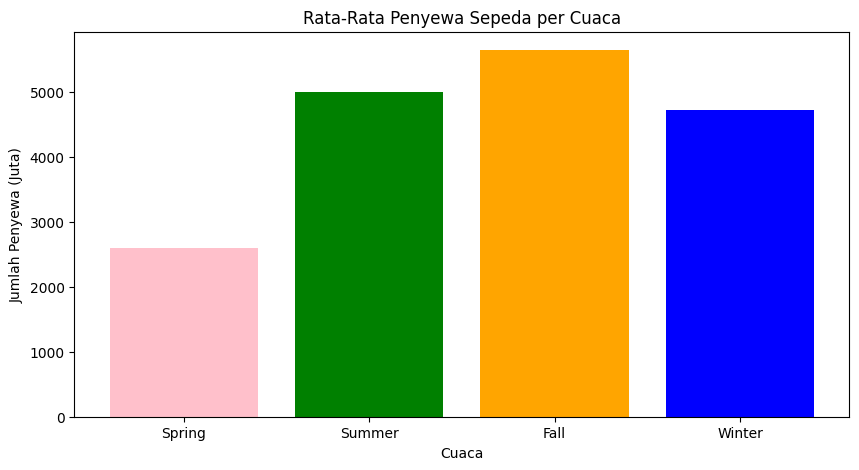

In [120]:
# Mengurutkan musim
day_df["season"] = pd.Categorical(
    day_df["season"],
    categories=["Spring", "Summer", "Fall", "Winter"],
    ordered=True
)
season_cnt = day_df.groupby(by="season")[["cnt"]].mean().reset_index()

colors = ['pink', 'green', 'orange', 'blue']

plt.figure(figsize=(10, 5))
plt.bar(
    x=season_cnt["season"],
    height=season_cnt["cnt"],
    color=colors
)
plt.title("Rata-Rata Penyewa Sepeda per Cuaca", loc="center")
plt.ylabel("Jumlah Penyewa (Juta)")
plt.xlabel("Cuaca")
plt.show()

**Insight**: Berdasarkan musim, rata-rata penyewa sepeda tertinggi adalah musim gugur (Fall), diikuti dengan musim panas (Summer), musim dingin (Winter), dan yang terakhir musim semi (Spring).

* Berdasarkan cuaca

<ipython-input-121-cf66b2f30248>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weather_cnt = day_df.groupby(by="weathersit")[["cnt"]].mean().reset_index()


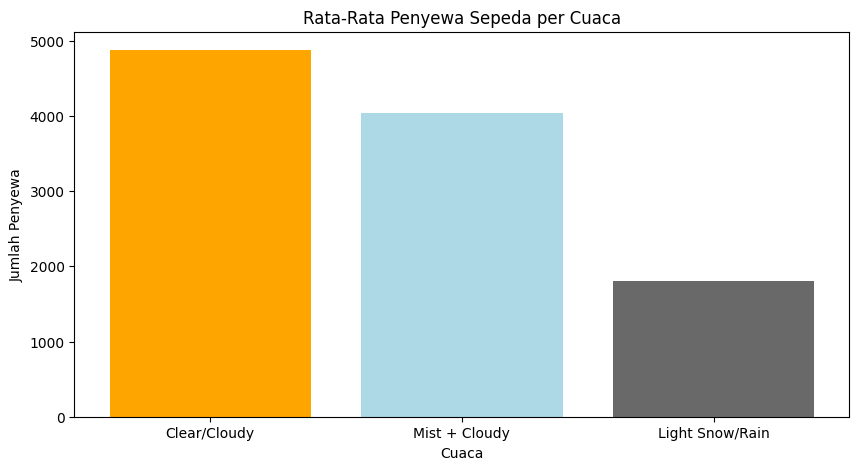

In [121]:
# Mengurutkan cuaca
day_df["weathersit"] = pd.Categorical(
    day_df["weathersit"],
    categories=["Clear/Cloudy", "Mist + Cloudy", "Light Snow/Rain", "Heavy Rain/Snow"],
    ordered=True)

weather_cnt = day_df.groupby(by="weathersit")[["cnt"]].mean().reset_index()

colors = ['orange', '#ADD8E6', '#696969', 'blue']

plt.figure(figsize=(10, 5))
plt.bar(
    x=weather_cnt["weathersit"],
    height=weather_cnt["cnt"],
    color=colors
)
plt.title("Rata-Rata Penyewa Sepeda per Cuaca", loc="center")
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Cuaca")
plt.show()

**Insight:** Berdasarkan cuaca, rata-rata penyewa cenderung memilih bersepeda ketika cuaca sedang cerah atau berawan (Clear/Cloudy). Cuaca yang dihindari untuk bersepeda yaitu ketika turun hujan/salju (Light Snow/Rain).

* Berdasarkan hari libur

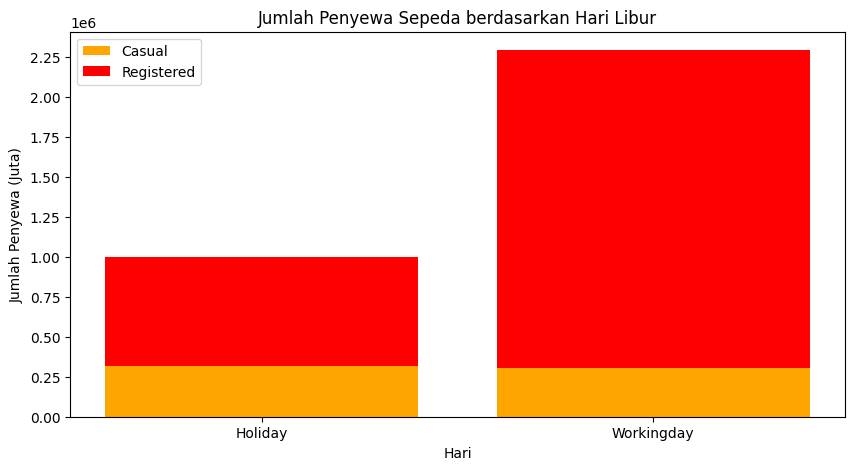

In [122]:
holiday_cnt = day_df.groupby(by="workingday")[["casual", "registered"]].sum().reset_index()

plt.figure(figsize=(10, 5))
plt.bar(
    x=holiday_cnt["workingday"],
    height=holiday_cnt["casual"],
    label="Casual",
    color="orange"
)
plt.bar(
    x=holiday_cnt["workingday"],
    height=holiday_cnt["registered"],
    bottom=holiday_cnt["casual"],
    label="Registered",
    color="red"
)

plt.title("Jumlah Penyewa Sepeda berdasarkan Hari Libur", loc="center")
plt.yticks(np.arange(0, 2500000, 250000))
plt.ylabel("Jumlah Penyewa (Juta)")
plt.xlabel("Hari")
plt.legend()
plt.show()

In [123]:
# Jumlah penyewa berdasarkan hari libur setiap tahun
day_df.groupby(by=['yr','workingday']).agg({
    "casual": "sum",
    "registered": "sum",
    "cnt": "sum"
})

casual  registered      cnt
yr   workingday                             
2011 Holiday     128898      257941   386839
     Workingday  118354      737910   856264
2012 Holiday     187834      425596   613430
     Workingday  184931     1251215  1436146

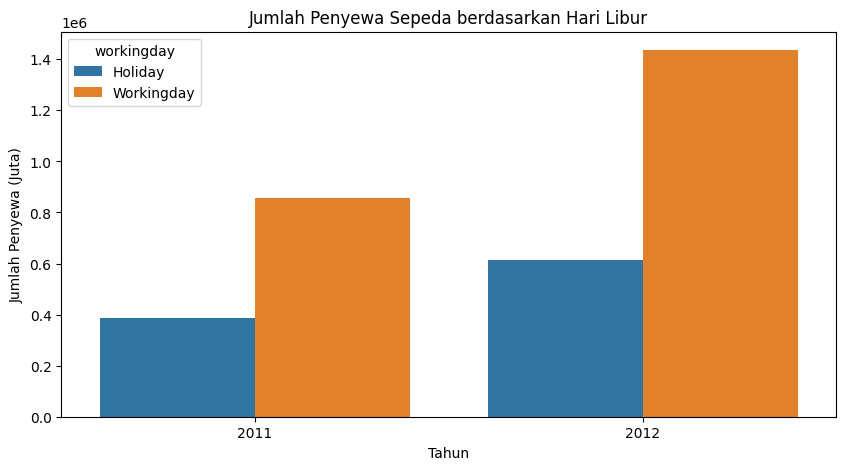

In [124]:
holidays_cnt = day_df.groupby(by=["workingday","yr"])["cnt"].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(
    data=holidays_cnt,
    x="yr",
    y="cnt",
    hue="workingday",
)
plt.title("Jumlah Penyewa Sepeda berdasarkan Hari Libur", loc="center")
plt.ylabel("Jumlah Penyewa (Juta)")
plt.xlabel("Tahun")
plt.show()

**Insight:**
* Berdasarkan hari libur, jumlah penyewa sepeda cenderung lebih banyak pada hari biasa/kerja daripada ketika hari libur. Jumlah kenaikannya sekitar 2 kali lipat dibanding hari libur.
* Untuk tipe penyewa masih didominasi dengan penyewa terdaftar yang mengalami kenaikan signifikan saat hari biasa. Sementara penyewa umum cenderung tidak berbeda jauh jumlahnya pada saat hari libur maupun hari biasa.

## Analisis Lanjutan

* Jumlah penyewa berdasarkan jam

In [125]:
# Jumlah penyewa setiap jam
hour_df.groupby('hr').agg({
    "cnt": ["min", "max", "mean", "sum"]
})

cnt                         
   min  max        mean     sum
hr                             
0    2  283   53.898072   39130
1    1  168   33.375691   24164
2    1  132   22.869930   16352
3    1   79   11.727403    8174
4    1   28    6.352941    4428
5    1   66   19.889819   14261
6    1  213   76.044138   55132
7    1  596  212.064649  154171
8    5  839  359.011004  261001
9   14  426  219.309491  159438
10   8  539  173.668501  126257
11  10  663  208.143054  151320
12   3  776  253.315934  184414
13  11  760  253.661180  184919
14  12  750  240.949246  175652
15   7  750  251.233196  183149
16  11  783  311.983562  227748
17  15  976  461.452055  336860
18  23  977  425.510989  309772
19  11  743  311.523352  226789
20  11  567  226.030220  164550
21   6  584  172.314560  125445
22   9  502  131.335165   95612
23   2  256   87.831044   63941

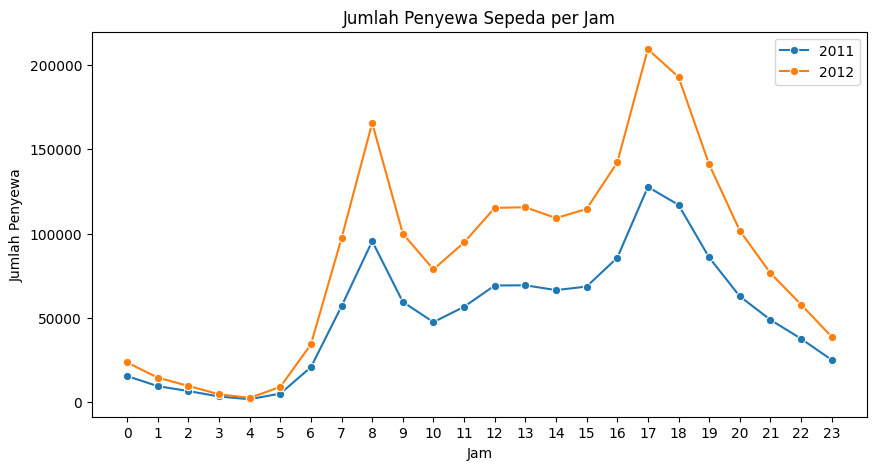

In [126]:
hour_df["yr"] = hour_df["yr"].map({0: "2011", 1: "2012"})

hour_cnt = hour_df.groupby(by=["hr", "yr"]).agg({
    "cnt": "sum"
}).reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(
    data=hour_cnt,
    x="hr",
    y="cnt",
    hue="yr",
    marker="o"
)
plt.title("Jumlah Penyewa Sepeda per Jam", loc="center")
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Jam")
plt.xticks(np.arange(0, 24, 1))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=10)
plt.show()

<ipython-input-127-40437e4c6324>:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  hour_cnt = hour_df.groupby(by="time_range").agg({


  time_range     cnt
0   Midnight   87820
1       Dawn  227992
2    Morning  420439
3       Noon  646910
4  Afternoon  358801
5     Sunset  564608
6    Evening  826556
7      Night  159553


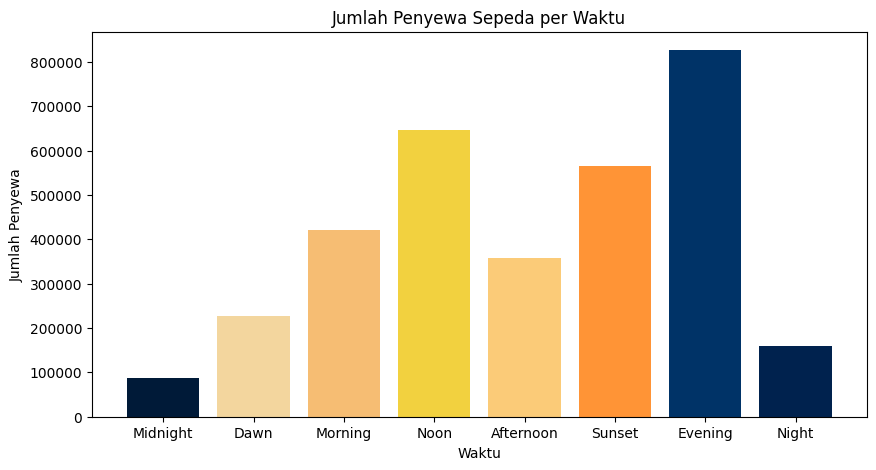

In [127]:
# Kolom baru untuk time range
time_range = [0, 4, 8, 10, 14, 16, 18, 22, 24]
labels = ['Midnight', 'Dawn', 'Morning', 'Noon', 'Afternoon', 'Sunset', 'Evening', 'Night']
hour_df['time_range'] = pd.cut(hour_df['hr'], bins=time_range, labels=labels, right=False)

# Mengurutkan waktu
hour_df["time_range"] = pd.Categorical(
    hour_df["time_range"],
    categories=["Midnight", "Dawn", "Morning", "Noon", "Afternoon", "Sunset", "Evening", "Night"],
    ordered=True
)

hour_cnt = hour_df.groupby(by="time_range").agg({
    "cnt": "sum"
}).reset_index()
print(hour_cnt)

colors = ['#001A38', '#F3D69E', '#F6BD73', '#F2D13F', '#FBCB78', '#FF9436', '#003367', '#00224E']

plt.figure(figsize=(10, 5))
plt.bar(
    x=hour_cnt["time_range"],
    height=hour_cnt["cnt"],
    color=colors
)
plt.title("Jumlah Penyewa Sepeda per Waktu", loc="center")
plt.ylabel("Jumlah Penyewa")
plt.xlabel("Waktu")
plt.show()

**Insight:** Jumlah penyewa setiap jamnya menunjukkan tren kenaikan dari tahun 2011 ke 2012. Sepeda ramai disewakan pada jam 08.00 pagi dan jam 05.00 sore. Sementara itu jumlah penyewa yang tidak berbeda jauh di tahun 2011 dan 2012 adalah pada jam 4.00 pagi. Selanjutnya, rata-rata penyewa sepeda mengalami kenaikan pada jam 5-8 pagi dan 3-5 sore. Hal ini menunjukkan bahwa penyewa sepeda cenderung mengendarai sepeda ketika berangkat/pulang beraktivitas karena jam 5-8 pagi waktu yang pas untuk berangkat sekolah/kerja dan jam 3-5 sore merupakan waktu pulang sekolah/kerja. Jika dikelompokkan dalam interval waktu berdasakan jam, maka waktu dengan paling banyak penyewa sepeda adalah waktu malam (evening) dan siang (noon).

## Conclusion



*   Terjadi tren kenaikan jumlah penyewa sepeda dari tahun 2011 ke tahun 2012. Rata-rata kenaikan jumlah penyewa terjadi pada awal tahun hingga tengah tahun (Januari-September) dan kemudian terjadi penurunan di akhir tahun (September-Januari).
*   Jumlah penyewa dipengaruhi oleh keadaan musim, cuaca, maupun hari libur. Diperhatikan
 1.   Musim dengan jumlah penyewa terbanyak adalah musim gugur (Fall) dan jumlah penyewa paling sedikit adalah musim semi (Spring). Penyewa menunjukkan kenaikan jumlah dari musim semi (Spring) ke musim gugur (Fall) lalu terjadi penurunan di musim dingin (Winter)
 2.   Cuaca dengan jumlah penyewa terbanyak adalah cuaca cerah/berawan (Clear/Cloudy). Pada cuaca berkabut dan hujan/salju ringan, banyak orang cenderung tidak seperti saat cuaca cerah.
 3. Pada hari biasa/kerja banyak sepeda yang disewakan dibandingkan dengan hari libur. Hal ini menunjukkan bahwa penyewa menggunakan sepeda untuk beraktivitas seperti kerja atau sekolah dibanding hanya untuk berliburan.
*   Jumlah penyewa mengalami kenaikan pada jam 5-8 pagi dan jam 2-5 sore. Interval waktu paling banyak penyewa adalah waktu malam (evening) dan yang kedua adalah waktu siang (noon). Hal ini menunjukkan bahwa penyewaan sepeda paling banyak dilakukan saat berangkat dan pulang beraktivitas.



In [128]:
!pip freeze > requirements.txt